[![Colab Badge](https://img.shields.io/badge/Open_in_Colab-blue?style=for-the-badge)][colab-link]
<a href="javascript:void(0);" onclick="openJupyterWidget('https://github.com/nmfs-opensci/nmfshackdays-2025/blob/main/topics-2025/2025-opendap/2-dbofs.ipynb');">
    <img src="https://img.shields.io/badge/Open_in_JupyterHub-orange?style=for-the-badge" alt="JupyterHub Badge">
</a> [![Download Badge](https://img.shields.io/badge/Download-grey?style=for-the-badge)][download-link]

[download-link]: https://nmfs-opensci.github.io/NMFSHackDays-2025/topics-2025/2025-opendap/2-dbofs.ipynb
[colab-link]: https://colab.research.google.com/github/nmfs-opensci/nmfshackdays-2025/blob/main/topics-2025/2025-opendap/2-dbofs.ipynb
[jupyter-link]: https://nmfs-openscapes.2i2c.cloud/hub/user-redirect/lab?fromURL=https://raw.githubusercontent.com/nmfs-opensci/nmfshackdays-2025/main/topics-2025/2025-opendap/2-dbofs.ipynb

>📘 Learning Objectives
>
> 1. Get more practice making data cubes from netcdf on THREDDS servers using OPeNDAP
> 2. Do some basic data aggregation and plotting

## Overview

This example is very similar to the first tutorial using NCEP-NCAR Reanalysis 1, but the netcdfs are slightly different and you will get more practice.  This tutorial uses an example where the server doesn't require authentication (username and password).

## Deleware Bay Forecast

We will create a data cube for data from the [Delaware Bay Operational Forecast System (DBOFS)](https://tidesandcurrents.noaa.gov/ofs/dbofs/dbofs.html). The approach is the same. We go to the [THREDDS server](https://opendap.co-ops.nos.noaa.gov/thredds/catalog/catalog.html) for NOS and navigate through until we find the OPeNDAP page for a file. Then we need to get the url format for each file. Here is an example for one day. Note they only keep recent data so this url will break after March 2025.
```
https://opendap.co-ops.nos.noaa.gov/thredds/dodsC/NOAA/DBOFS/MODELS/2025/03/14/dbofs.t18z.20250314.regulargrid.n001.nc
```

First step is to create some file urls.

In [26]:
import xarray as xr

In [88]:
base = 'https://opendap.co-ops.nos.noaa.gov/thredds/dodsC/\
NOAA/DBOFS/MODELS/2025/03/14/dbofs.t%2.2dz.20250314.regulargrid.n001.nc'
files = [base % d for d in range(0,24,6)]
files

['https://opendap.co-ops.nos.noaa.gov/thredds/dodsC/NOAA/DBOFS/MODELS/2025/03/14/dbofs.t00z.20250314.regulargrid.n001.nc',
 'https://opendap.co-ops.nos.noaa.gov/thredds/dodsC/NOAA/DBOFS/MODELS/2025/03/14/dbofs.t06z.20250314.regulargrid.n001.nc',
 'https://opendap.co-ops.nos.noaa.gov/thredds/dodsC/NOAA/DBOFS/MODELS/2025/03/14/dbofs.t12z.20250314.regulargrid.n001.nc',
 'https://opendap.co-ops.nos.noaa.gov/thredds/dodsC/NOAA/DBOFS/MODELS/2025/03/14/dbofs.t18z.20250314.regulargrid.n001.nc']

Then we can open these as usual with xarray.

In [92]:
%%time
ds = xr.open_mfdataset(files, parallel=True)
ds

CPU times: user 293 ms, sys: 53.8 ms, total: 347 ms
Wall time: 6.62 s


<xarray.Dataset> Size: 392MB
Dimensions:      (time: 4, ny: 487, nx: 529, Depth: 22)
Coordinates:
  * Depth        (Depth) float64 176B 0.0 1.0 2.0 4.0 ... 80.0 90.0 100.0 125.0
    Latitude     (ny, nx) float64 2MB dask.array<chunksize=(487, 529), meta=np.ndarray>
    Longitude    (ny, nx) float64 2MB dask.array<chunksize=(487, 529), meta=np.ndarray>
  * time         (time) datetime64[ns] 32B 2025-03-13T19:00:00 ... 2025-03-14...
Dimensions without coordinates: ny, nx
Data variables:
    h            (time, ny, nx) float64 8MB dask.array<chunksize=(1, 487, 529), meta=np.ndarray>
    mask         (time, ny, nx) float64 8MB dask.array<chunksize=(1, 487, 529), meta=np.ndarray>
    zeta         (time, ny, nx) float32 4MB dask.array<chunksize=(1, 487, 529), meta=np.ndarray>
    zetatomllw   (time, ny, nx) float32 4MB dask.array<chunksize=(1, 487, 529), meta=np.ndarray>
    u_eastward   (time, Depth, ny, nx) float32 91MB dask.array<chunksize=(1, 22, 487, 529), meta=np.ndarray>
    v_northward  (time, Depth, ny, nx) float32 91MB dask.array<chunksize=(1, 22, 487, 529), meta=np.ndarray>
    temp         (time, Depth, ny, nx) float32 91MB dask.array<chunksize=(1, 22, 487, 529), meta=np.ndarray>
    salt         (time, Depth, ny, nx) float32 91MB dask.array<chunksize=(1, 22, 487, 529), meta=np.ndarray>
Attributes: (12/36)
    file:                            dbofs.t00z.20250314.fields.nowcast_0002.nc
    format:                          netCDF-4/HDF5 file
    Conventions:                     CF-1.4, SGRID-0.3
    type:                            ROMS/TOMS history file
    title:                           dbofs nowcast RUN in operational mode
    var_info:                        varinfo.yaml
    ...                              ...
    compiler_flags:                  -fp-model precise -ip -O3
    tiling:                          008x016
    history:                         ROMS/TOMS, Version 4.2, Friday - March 1...
    ana_file:                        ROMS/Functionals/ana_btflux.h, ROMS/Func...
    CPP_options:                     mode, ADD_FSOBC, ADD_M2OBC, ANA_BSFLUX, ...
    DODS_EXTRA.Unlimited_Dimension:  time

In [84]:
# each file is about 100Mb
print(f"{ds.isel(time=1).nbytes / 1e6} Mb")

100.9884 Mb


Next we can plot a map of the temperature at one time point.

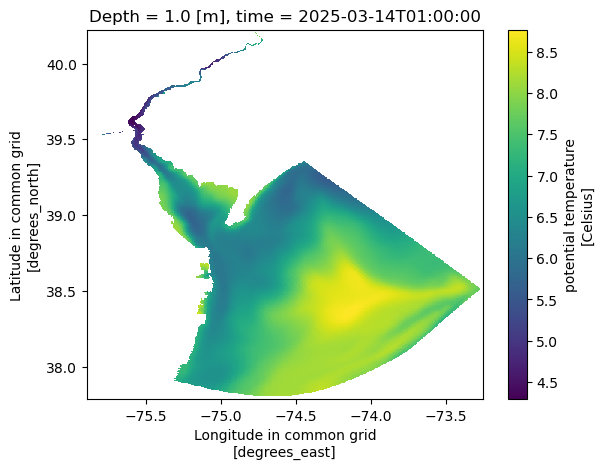

In [53]:
ds.temp.isel(Depth=1, time=1).plot(x='Longitude', y='Latitude');

And we can get the mean temperature for the 4 time points.

CPU times: user 58.2 ms, sys: 3.28 ms, total: 61.5 ms
Wall time: 1.19 s


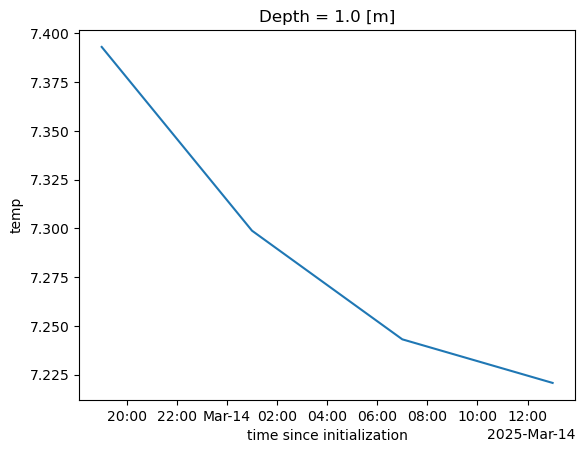

In [82]:
%%time
ds_mean = ds["temp"].isel(Depth=1).mean(dim=['ny', 'nx'])
ds_mean.plot();

### A plot of temperature by depth

Here I will make a plot of temperature by depth in the middle of the bay.

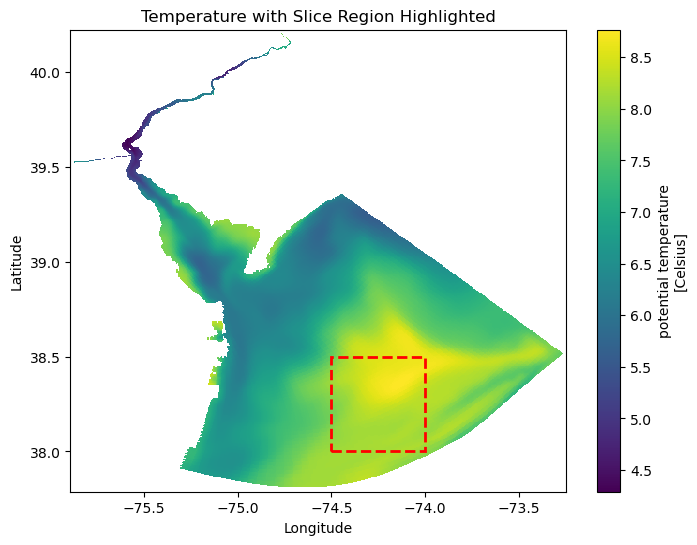

In [87]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Plot the full dataset
fig, ax = plt.subplots(figsize=(8, 6))
ds2.temp.isel(Depth=1, time=1).plot(x="Longitude", y="Latitude", ax=ax)

# Define the slice box coordinates
lon_min, lon_max = -74.5, -74
lat_min, lat_max = 38, 38.5

# Create a rectangular patch (bounding box)
box = patches.Rectangle(
    (lon_min, lat_min),  # Bottom-left corner (lon, lat)
    lon_max - lon_min,   # Width (longitude range)
    lat_max - lat_min,   # Height (latitude range)
    linewidth=2, edgecolor='red', facecolor='none', linestyle="--"
)

# Add the box to the plot
ax.add_patch(box)

# Customize the plot
ax.set_title("Temperature with Slice Region Highlighted")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


First, I am going to fix the indices to use lat/lon.

In [93]:
# because I want to slice with actual lat lon
lat_values = ds.isel(time=1, Depth=1, nx=1).Latitude.values
lon_values = ds.isel(time=1, Depth=1, ny=1).Longitude.values
ds = ds.assign_coords({"ny": lat_values, "nx": lon_values})
ds = ds.rename({"ny": "lat", "nx": "lon"})

Create a mean by depth for each time period.

In [94]:
depth_slice = ds["temp"].sel(lon=slice(-74.5,-74), lat=slice(38, 38.5))

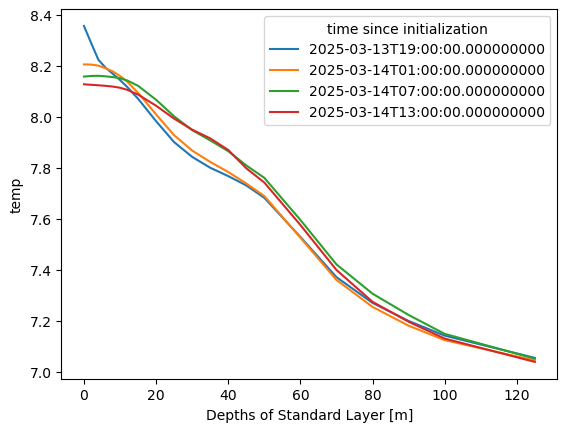

In [72]:
depth_slice.mean(dim=['lat', 'lon']).plot.line(x="Depth");

## Data on AWS

The data are also available on AWS in a S3 bucket. Let's compare data access to that. https://noaa-nos-ofs-pds.s3.amazonaws.com/index.html The data are here but you need to know how to make s3 urls.
```
https://noaa-nos-ofs-pds.s3.amazonaws.com/dbofs/netcdf/2025/03/14/dbofs.t00z.20250314.regulargrid.n001.nc
```
becomes this
```
s3://noaa-nos-ofs-pds/dbofs/netcdf/2025/03/14/dbofs.t00z.20250314.regulargrid.n001.nc
```

To open netcdf on s3, we need to create a "fileset"; we cannot just us the list of urls like we can for the OPeNDAP links.

In [75]:
# create the file urls to s3 bucket
base = 's3://noaa-nos-ofs-pds/dbofs/netcdf/2025/03/14/dbofs.t%2.2dz.20250314.regulargrid.n001.nc'
s3_files = [base % d for d in range(0,24,6)]
s3_files

['s3://noaa-nos-ofs-pds/dbofs/netcdf/2025/03/14/dbofs.t00z.20250314.regulargrid.n001.nc',
 's3://noaa-nos-ofs-pds/dbofs/netcdf/2025/03/14/dbofs.t06z.20250314.regulargrid.n001.nc',
 's3://noaa-nos-ofs-pds/dbofs/netcdf/2025/03/14/dbofs.t12z.20250314.regulargrid.n001.nc',
 's3://noaa-nos-ofs-pds/dbofs/netcdf/2025/03/14/dbofs.t18z.20250314.regulargrid.n001.nc']

In [74]:
# each file is about 100Mb
fs.size(s3_files[1])/1e6  # MB#

101.415959

In [76]:
# Run this code once to set up s3 access
import s3fs 
fs = s3fs.S3FileSystem(anon=True)

# Create a fileset
fileset = [fs.open(file) for file in s3_files]

We open up the fileset.

In [77]:
%%time
ds2 = xr.open_mfdataset(fileset)

CPU times: user 2.17 s, sys: 996 ms, total: 3.17 s
Wall time: 28.4 s


We know have a data cube that we can work with same as with our data cube from the OPeNDAP server. The data are only loaded when we need them (to plot or compute).  Data access is considerably slower than for the OPeNDAP server. I don't know why that is.

CPU times: user 1.89 s, sys: 877 ms, total: 2.77 s
Wall time: 22.7 s


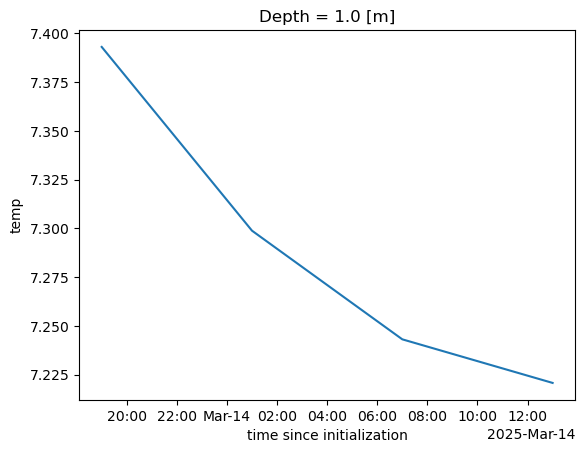

In [79]:
%%time
ds2_mean = ds2["temp"].isel(Depth=1).mean(dim=['ny', 'nx'])
ds2_mean.plot();

## Conclusion

We worked through another example of getting data off an OPeNDAP server and compared to getting the data off an S3 bucket.

## References

* Open files in S3 bucket https://nbviewer.org/gist/rsignell-usgs/111222351c4fee9e99827844351ab952
* https://www.jamstec.go.jp/ridinfo/xarray-and-opendap/
* More opendap + xarray debugging https://github.com/stuckyb/gcdl/issues/24
* Another opendap example https://github.com/ornldaac/daymet-python-opendap-xarray/blob/master/1_daymetv4_discovery_access_subsetting.ipynb
* Nice example https://rabernat.github.io/research_computing_2018/xarray-tips-and-tricks.html



